In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import pickle

In [2]:
df = pd.read_csv('data/air_pollution_2024_with_prep.csv')
df

,id,date,time,pm25,pm10,o3,co,no2,so2
0,02t,2023-12-01,00:00:00,33.000000,54.702032,27.635492,0.634761,10.413959,1.776749
1,02t,2023-12-01,01:00:00,41.000000,54.702032,27.635492,0.634761,10.413959,1.776749
2,02t,2023-12-01,02:00:00,34.000000,54.702032,27.635492,0.634761,10.413959,1.776749
3,02t,2023-12-01,03:00:00,34.000000,54.702032,27.635492,0.634761,10.413959,1.776749
4,02t,2023-12-01,04:00:00,36.000000,54.702032,27.635492,0.634761,10.413959,1.776749
...,...,...,...,...,...,...,...,...,...
129538,93t,2024-01-31,20:00:00,11.000000,23.000000,24.000000,0.210000,2.000000,1.776749
129539,93t,2024-01-31,21:00:00,12.000000,24.000000,23.000000,0.200000,1.000000,1.776749
129540,93t,2024-01-31,22:00:00,14.000000,25.000000,22.000000,0.200000,2.000000,1.776749
129541,93t,2024-01-31,23:00:00,15.000000,29.000000,20.000000,0.200000,2.000000,1.776749


# แยก Feature และ Target

In [4]:
X = df[['pm10', 'o3', 'co', 'no2', 'so2']]
X

,pm10,o3,co,no2,so2
0,54.702032,27.635492,0.634761,10.413959,1.776749
1,54.702032,27.635492,0.634761,10.413959,1.776749
2,54.702032,27.635492,0.634761,10.413959,1.776749
3,54.702032,27.635492,0.634761,10.413959,1.776749
4,54.702032,27.635492,0.634761,10.413959,1.776749
...,...,...,...,...,...
129538,23.000000,24.000000,0.210000,2.000000,1.776749
129539,24.000000,23.000000,0.200000,1.000000,1.776749
129540,25.000000,22.000000,0.200000,2.000000,1.776749
129541,29.000000,20.000000,0.200000,2.000000,1.776749


In [5]:
y = df['pm25']
y

0         33.000000
1         41.000000
2         34.000000
3         34.000000
4         36.000000
            ...    
129538    11.000000
129539    12.000000
129540    14.000000
129541    15.000000
129542    30.406467
Name: pm25, Length: 129543, dtype: float64

# Feature Scaling
- การทำงานของ Min-Max Scaling คือการแปลงค่าของแต่ละคุณสมบัติในชุดข้อมูลให้อยู่ในช่วงที่กำหนด (ปกติจะอยู่ในช่วงระหว่าง 0 ถึง 1)

In [6]:
scaler = MinMaxScaler()

In [7]:
X_norm = scaler.fit_transform(X)
X_norm

array([[0.0919965 , 0.15220281, 0.00847134, 0.09806207, 0.00488521],
       [0.0919965 , 0.15220281, 0.00847134, 0.09806207, 0.00488521],
       [0.0919965 , 0.15220281, 0.00847134, 0.09806207, 0.00488521],
       ...,
       [0.03914591, 0.12      , 0.00257627, 0.01041667, 0.00488521],
       [0.04626335, 0.10857143, 0.00257627, 0.01041667, 0.00488521],
       [0.0919965 , 0.15220281, 0.00847134, 0.09806207, 0.00488521]])

# แยกชุดข้อมูลออกเป็นฝึก(train)และทดสอบข้อมูล(test)

In [8]:
X_train, X_test, y_train, y_test = train_test_split( X_norm, y, test_size=0.2, random_state=42) 

In [9]:
print("Train shape: ", X_train.shape)
print("Test shape: ", X_test.shape)

Train shape:  (103634, 5)
Test shape:  (25909, 5)


## Linear regression model
- LinearRegression() 
## Multi-layer Perceptron regressor
- MLPRegressor()
## Support Vector Regressor
- svr()

In [10]:
lr = LinearRegression() 
mlr = MLPRegressor() 
svr = SVR()

# ปรับ Regressor ให้พอดีกับข้อมูล / Model training

In [11]:
lr.fit(X_train, y_train)
mlr.fit(X_train, y_train)
svr.fit(X_train, y_train)

SVR()

# Model Testing และ Evaluation

In [12]:
def calculate_metrics(X, Y, model):
    pred = model.predict(X)
    mse = mean_squared_error(Y, pred)
    rmse = mse ** 0.5
    mae = mean_absolute_error(Y, pred)
    r2 = r2_score(Y, pred)
    
    return rmse, mae, r2

In [13]:
lr_rmse, lr_mae, lr_r2 = calculate_metrics(X_test, y_test, lr)
print(f"RMSE: {lr_rmse}")
print(f"MAE: {lr_mae}")
print(f"R^2: {lr_r2}")

RMSE: 12.736440776154703
MAE: 8.963244701932238
R^2: 0.43302203520306215


In [14]:
mlr_rmse, mlr_mae, mlr_r2 = calculate_metrics(X_test, y_test, mlr)
print(f"RMSE: {mlr_rmse}")
print(f"MAE: {mlr_mae}")
print(f"R^2: {mlr_r2}")

RMSE: 12.629696749589478
MAE: 8.935421445344438
R^2: 0.4424858872795412


In [15]:
svr_rmse, svr_mae, svr_r2 = calculate_metrics(X_test, y_test, svr)
print(f"RMSE: {svr_rmse}")
print(f"MAE: {svr_mae}")
print(f"R^2: {svr_r2}")

RMSE: 12.667628554996712
MAE: 8.84822608035184
R^2: 0.4391320024963349


# Visualising ผลลัพธ์ของ Test set

In [16]:
y_lr_pred = lr.predict(X_test[:100])
y_lr_pred

array([20.38472731, 30.38242057, 18.48148819, 18.19395358, 32.31226853,
       30.38242057, 30.38242057, 24.96262415, 28.1953473 , 20.69492957,
       30.3659917 , 46.26441037, 34.12075345, 26.98150927, 45.01177347,
       28.35264615, 30.38242057, 14.8886112 , 30.38242057, 26.42127895,
       30.38242057, 23.89546982, 30.38242057, 30.52387993, 44.49532803,
       34.50971971, 28.77413214, 20.16393983, 48.29418943, 62.28587802,
       30.09887706, 50.32396849, 30.38242057, 37.52122294, 10.71127132,
       17.55010845, 14.53182511, 30.38242057, 26.19591393, 29.58306858,
       30.38242057, 24.44428544, 49.77515288, 22.41450637, 30.43200746,
       20.38472731, 30.38242057, 31.20382824, 40.68251794, 30.38242057,
       15.44179969, 16.24425552, 30.38242057, 29.5187331 , 30.38242057,
       30.38242057, 30.38242057, 12.67372529, 30.38242057, 30.38242057,
       30.38242057, 29.47856245, 24.9517302 , 15.69482861, 30.38242057,
       29.47635869, 29.37839446, 35.05138226, 30.38242057, 30.38

In [18]:
y_mlr_pred = mlr.predict(X_test[:100])
y_mlr_pred

array([20.04365192, 30.90351719, 15.65630126, 15.36553133, 33.32611519,
       30.90351719, 30.90351719, 22.98518678, 26.6074098 , 19.0179948 ,
       30.84659964, 47.4129806 , 33.57318084, 27.20932118, 46.55884021,
       27.61730298, 30.90351719, 11.98320633, 30.90351719, 25.62127234,
       30.90351719, 23.89861427, 30.90351719, 30.37279691, 22.92701347,
       33.29854828, 27.58396146, 18.65975539, 49.42807726, 62.72592952,
       29.92118565, 51.44317392, 30.90351719, 37.09623876,  8.28349757,
       14.9100768 , 11.89536998, 30.90351719, 26.21660784, 30.23974887,
       30.90351719, 24.45329454, 50.91624594, 22.24847323, 30.90768224,
       20.04365192, 30.90351719, 30.96046242, 41.8714648 , 30.90351719,
       14.05873856, 13.84775277, 30.90351719, 29.96534782, 30.90351719,
       30.90351719, 30.90351719, 10.03592755, 30.90351719, 30.90351719,
       30.90351719, 27.5267846 , 25.00449987, 13.85708835, 30.90351719,
       27.38181177, 27.2898466 , 33.78140983, 30.90351719, 30.90

In [17]:
y_svr_pred = svr.predict(X_test[:100])
y_svr_pred

array([18.85166706, 30.30609212, 17.25913757, 15.68607526, 32.45026922,
       30.30609212, 30.30609212, 22.89104522, 26.77065156, 18.51533441,
       30.27698884, 47.76852074, 36.25930511, 26.40436437, 43.29501959,
       32.01500913, 30.30609212, 13.03913541, 30.30609212, 25.7336078 ,
       30.30609212, 22.72152965, 30.30609212, 32.55041023, 26.64069407,
       32.13889322, 25.74627651, 17.73065858, 49.89586309, 64.35842913,
       29.81156338, 52.00299647, 30.30609212, 37.4030062 ,  8.3103221 ,
       17.50194382, 12.5132205 , 30.30609212, 27.38181269, 29.31224542,
       30.30609212, 23.48553526, 51.15840488, 21.1588717 , 30.61079523,
       18.85166706, 30.30609212, 29.46806814, 41.80153151, 30.30609212,
       13.07623604, 14.78239661, 30.30609212, 29.3180564 , 30.30609212,
       30.30609212, 30.30609212, 10.39640246, 30.30609212, 30.30609212,
       30.30609212, 27.00181082, 24.06889685, 13.65497506, 30.30609212,
       27.07912269, 26.90120957, 34.58499246, 30.30609212, 30.30

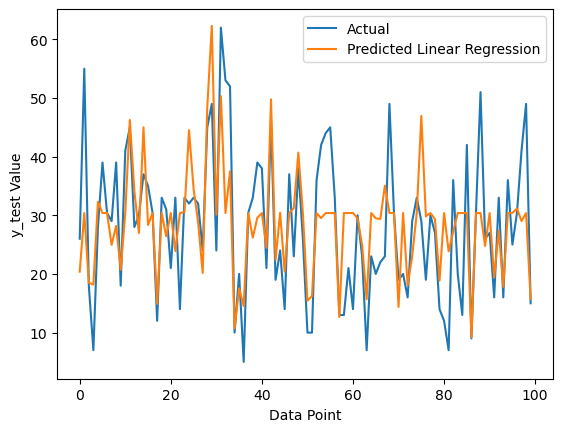

<Figure size 1200x400 with 0 Axes>

In [19]:
sns.lineplot(x=range(len(y_test[:100])), y=y_test[:100], label='Actual')
sns.lineplot(x=range(len(y_lr_pred)), y=y_lr_pred, label='Predicted Linear Regression')

plt.xlabel("Data Point")
plt.ylabel("y_test Value")
plt.figure(figsize=(12, 4))
plt.show()

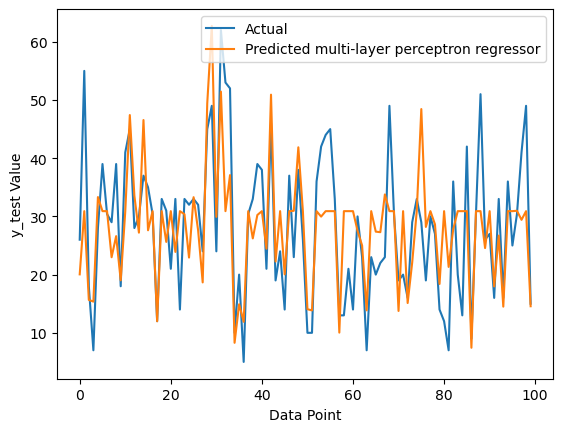

<Figure size 1200x400 with 0 Axes>

In [20]:
sns.lineplot(x=range(len(y_test[:100])), y=y_test[:100], label='Actual')
sns.lineplot(x=range(len(y_mlr_pred)), y=y_mlr_pred, label='Predicted multi-layer perceptron regressor')

plt.xlabel("Data Point")
plt.ylabel("y_test Value")
plt.figure(figsize=(12, 4))
plt.show()

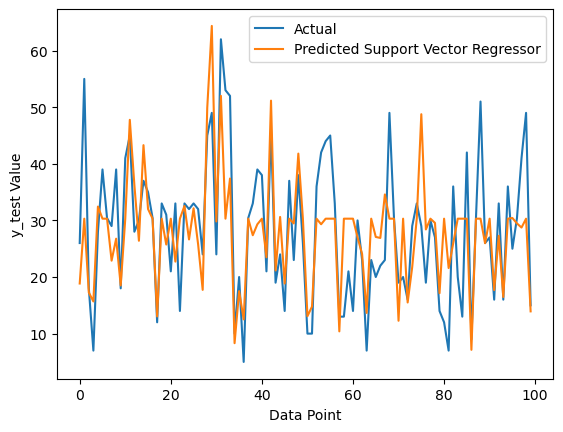

<Figure size 1200x400 with 0 Axes>

In [21]:
sns.lineplot(x=range(len(y_test[:100])), y=y_test[:100], label='Actual')
sns.lineplot(x=range(len(y_svr_pred)), y=y_svr_pred, label='Predicted Support Vector Regressor')

plt.xlabel("Data Point")
plt.ylabel("y_test Value")
plt.figure(figsize=(12, 4))
plt.show()

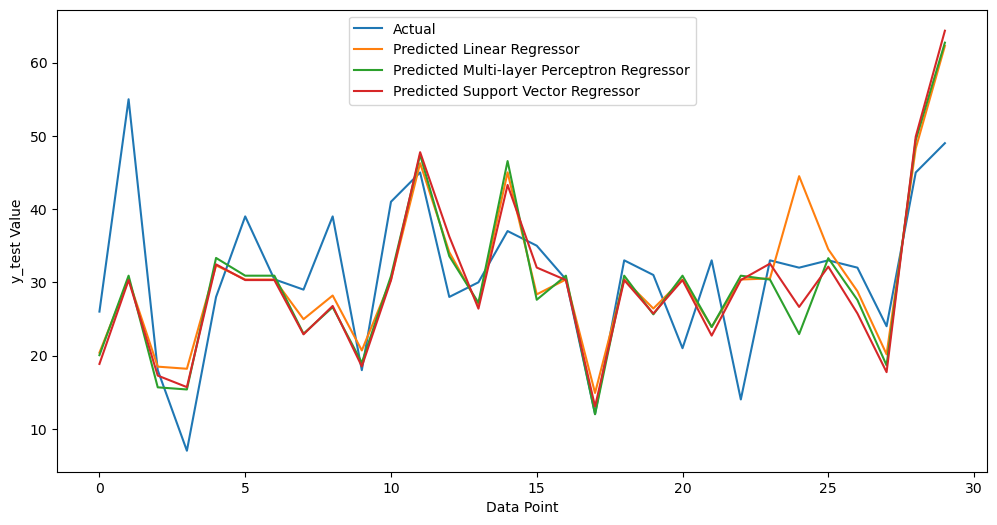

In [22]:
plt.figure(figsize=(12, 6))

# Plot actual data
sns.lineplot(x=range(len(y_test[:30])), y=y_test[:30], label='Actual')

# Plot predicted data for Linear Regression
sns.lineplot(x=range(len(y_lr_pred[:30])), y=y_lr_pred[:30], label='Predicted Linear Regressor')

# Plot predicted data for Multi-layer Perceptron Regression
sns.lineplot(x=range(len(y_mlr_pred[:30])), y=y_mlr_pred[:30], label='Predicted Multi-layer Perceptron Regressor')

# Plot predicted data for Support Vector Regression
sns.lineplot(x=range(len(y_svr_pred[:30])), y=y_svr_pred[:30], label='Predicted Support Vector Regressor')

plt.xlabel("Data Point")
plt.ylabel("y_test Value")
plt.legend()
plt.show()

In [23]:
data = {'model': ['LR', 'MLR', 'SVR'],
        'MAE': [lr_mae, mlr_mae, svr_mae],
        'RMSE': [lr_rmse, mlr_rmse, svr_rmse],
        'R^2': [lr_r2, mlr_r2, svr_r2]}

perfomance = pd.DataFrame(data)
perfomance

,model,MAE,RMSE,R^2
0,LR,8.963245,12.736441,0.433022
1,MLR,8.935421,12.629697,0.442486
2,SVR,8.848226,12.667629,0.439132


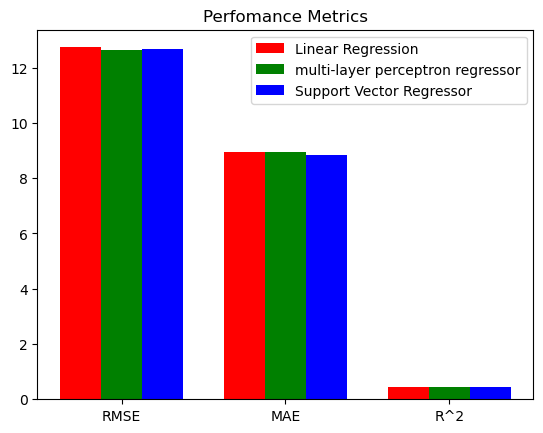

In [24]:
N = 3
ind = np.arange(N)  
width = 0.25
  
xvals = [lr_rmse, lr_mae, lr_r2] 
bar1 = plt.bar(ind, xvals, width, color = 'r') 
  
yvals = [mlr_rmse, mlr_mae, mlr_r2] 
bar2 = plt.bar(ind+width, yvals, width, color='g') 
  
zvals = [svr_rmse, svr_mae, svr_r2] 
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b') 
  
plt.title("Perfomance Metrics") 
  
plt.xticks(ind+width,['RMSE', 'MAE', 'R^2']) 
plt.legend( (bar1, bar2, bar3), ('Linear Regression', 'multi-layer perceptron regressor', 'Support Vector Regressor') ) 
plt.show() 

### LR (Linear Regression) และ MLR (Multiple Linear Regression) มีผลลัพธ์ที่ดีกว่า SVR (Support Vector Regression) โดยทั่วไปแล้ว เราจะเลือกโมเดลที่มีค่า R² สูงสุด เนื่องจาก R² แสดงถึงความสามารถในการอธิบายข้อมูลของโมเดล ดังนั้นโมเดลที่ดีที่สุดในที่นี้คือ MLR (Multiple Linear Regression) ที่มีค่า R² เท่ากับ 0.442486 ซึ่งสูงกว่า LR (Linear Regression) อีก ดังนั้น MLR ควรเป็นตัวเลือกที่ดีที่สุดสำหรับการใช้งานในที่นี้

In [25]:
# save model
pickle.dump(lr, open("model/lr_model.pickle", 'wb'))
pickle.dump(mlr, open("model/mlr_model.pickle", 'wb'))
pickle.dump(svr, open("model/svr_model.pickle", 'wb'))